In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv(r'C:/Users/INTEL/Downloads/Air Quality of Beijing/beijing_train.csv')
df_train

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403771,33644,2016,12,31,19,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,1022.0,-6.1,0.0,ESE,0.9,Wanshouxigong
403772,33645,2016,12,31,20,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,1022.4,-5.5,0.0,ENE,0.7,Wanshouxigong
403773,33646,2016,12,31,21,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,1022.1,-5.3,0.0,E,0.9,Wanshouxigong
403774,33647,2016,12,31,22,493.0,537.0,12.0,124.0,5000.0,8.0,-3.0,1022.7,-5.0,0.0,SW,0.1,Wanshouxigong


In [3]:
df_test=pd.read_csv(r'C:/Users/INTEL/Downloads/Air Quality of Beijing/beijing_test.csv')
df_test

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,35060,2017,2,28,19,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
16724,35061,2017,2,28,20,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
16725,35062,2017,2,28,21,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
16726,35063,2017,2,28,22,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [5]:
df_train.shape,df_test.shape

((403776, 18), (16728, 17))

In [6]:
#ratio of null values
df_train.isnull().sum()/df_train.shape[0] *100

REF_NO     0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.098936
PM10       1.540953
SO2        2.173482
NO2        2.937024
CO         5.017881
O3         3.221341
TEMP       0.065383
PRES       0.065630
DEWP       0.066621
RAIN       0.064640
wd         0.344003
WSPM       0.058944
station    0.000000
dtype: float64

In [7]:
#ratio of null values
df_test.isnull().sum()/df_test.shape[0] *100

REF_NO     0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

In [8]:
#categorical features
categorical = df_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 2
Numerical Features in Train Set: 16


In [9]:
#categorical features
categorical = df_test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= df_test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 2
Numerical Features in Test Set: 15


In [10]:
df_train.isnull().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [11]:
df_test.isnull().sum()

REF_NO     0
year       0
month      0
day        0
hour       0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [12]:
df_train['PM10'].fillna(df_train['PM10'].median(), inplace=True)
df_train['SO2'].fillna(df_train['SO2'].median(), inplace=True)
df_train['NO2'].fillna(df_train['NO2'].mean(), inplace=True)
df_train['CO'].fillna(df_train['CO'].median(), inplace=True)
df_train['O3'].fillna(df_train['O3'].median(), inplace=True)
df_train['PM2.5'].fillna(df_train['PM2.5'].median(), inplace=True)
df_train['wd'].fillna(df_train['wd'].mode()[0], inplace=True)
df_train['DEWP'].fillna(df_train['DEWP'].mean(), inplace=True)
df_train['PRES'].fillna(df_train['PRES'].mean(), inplace=True)
df_train['TEMP'].fillna(df_train['TEMP'].mean(), inplace=True)
df_train['WSPM'].fillna(df_train['WSPM'].median(), inplace=True)
df_train['RAIN'].fillna(df_train['RAIN'].median(),inplace=True)
df_train

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403771,33644,2016,12,31,19,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,1022.0,-6.1,0.0,ESE,0.9,Wanshouxigong
403772,33645,2016,12,31,20,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,1022.4,-5.5,0.0,ENE,0.7,Wanshouxigong
403773,33646,2016,12,31,21,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,1022.1,-5.3,0.0,E,0.9,Wanshouxigong
403774,33647,2016,12,31,22,493.0,537.0,12.0,124.0,5000.0,8.0,-3.0,1022.7,-5.0,0.0,SW,0.1,Wanshouxigong


In [13]:
df_train.dtypes

REF_NO       int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

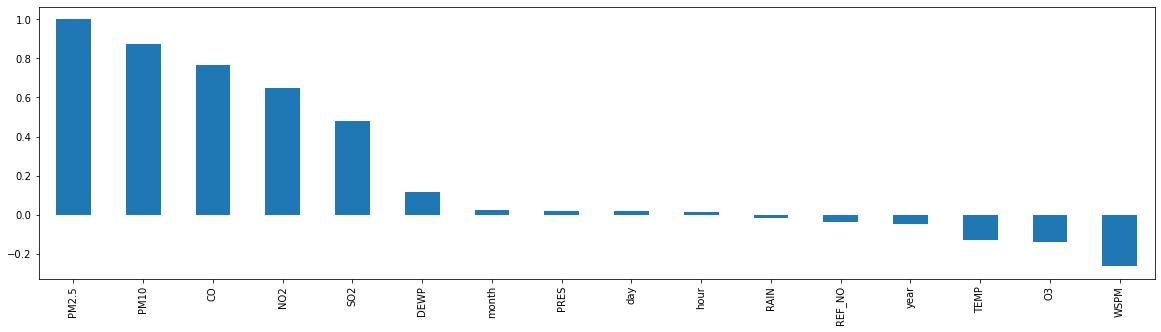

In [14]:
plt.figure(figsize=(16,10))
df_train.corr()['PM2.5'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

##### Model Evaluation

###### Preparing X and y for training and testing 

In [41]:
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0


In [42]:
df_train.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

###### Dropping unwanted columns 

In [43]:
df_train = df_train.drop('station', axis=1)
df_train = df_train.drop('wd', axis=1)
df_train

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403771,33644,2016,12,31,19,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,1022.0,-6.1,0.0,0.9
403772,33645,2016,12,31,20,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,1022.4,-5.5,0.0,0.7
403773,33646,2016,12,31,21,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,1022.1,-5.3,0.0,0.9
403774,33647,2016,12,31,22,493.0,537.0,12.0,124.0,5000.0,8.0,-3.0,1022.7,-5.0,0.0,0.1


In [44]:
feature_cols = ['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
X = df_train[feature_cols]
X

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403771,33644,2016,12,31,19,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,1022.0,-6.1,0.0,0.9
403772,33645,2016,12,31,20,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,1022.4,-5.5,0.0,0.7
403773,33646,2016,12,31,21,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,1022.1,-5.3,0.0,0.9
403774,33647,2016,12,31,22,493.0,537.0,12.0,124.0,5000.0,8.0,-3.0,1022.7,-5.0,0.0,0.1


In [45]:
y = df_train['PM2.5']
y

0           4.0
1           8.0
2           7.0
3           6.0
4           3.0
          ...  
403771    449.0
403772    460.0
403773    463.0
403774    493.0
403775    464.0
Name: PM2.5, Length: 403776, dtype: float64

In [46]:
y.head()

0    4.0
1    8.0
2    7.0
3    6.0
4    3.0
Name: PM2.5, dtype: float64

In [47]:
print(X.shape)
print(y.shape)

(403776, 16)
(403776,)


###### Splitting Dataset into testing and training

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=30)

In [50]:
X_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
60195,26548,2016,3,11,3,9.0,46.0,2.0,17.0,400.0,59.0,-0.3,1018.0,-19.0,0.0,1.7
278899,9716,2014,4,9,19,67.0,410.0,2.0,23.0,300.0,100.0,22.2,1011.5,1.2,0.0,2.7
269781,598,2013,3,25,21,142.0,177.0,38.0,128.0,1500.0,11.0,6.2,1015.4,-6.8,0.0,1.3
183748,15509,2014,12,7,4,132.0,197.0,70.0,104.0,2800.0,9.0,-0.1,1015.0,-13.8,0.0,0.9
59964,26317,2016,3,1,12,100.0,132.0,29.0,91.0,1600.0,26.0,6.2,1015.1,-11.9,0.0,1.8


In [51]:
X_test.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
128744,27801,2016,5,2,8,117.0,307.0,2.0,25.0,2100.0,81.0,14.2,1005.9,7.0,0.8,3.4
139720,5129,2013,9,30,16,153.0,134.0,41.0,53.0,1600.0,64.0,19.9,1011.5,16.9,0.0,0.6
276388,7205,2013,12,26,4,6.0,6.0,1.0,5.0,200.0,64.0,-4.9,1030.7,-20.6,0.0,3.9
81225,13930,2014,10,2,9,38.0,38.0,2.0,20.0,1000.0,2.0,13.6,1004.3,11.5,0.0,1.8
85211,17916,2015,3,17,11,15.0,23.0,2.0,2.0,200.0,94.0,15.5,1011.9,-6.8,0.0,2.8


In [52]:
y_train.head()

60195       9.0
278899     67.0
269781    142.0
183748    132.0
59964     100.0
Name: PM2.5, dtype: float64

In [53]:
y_test.head()

128744    117.0
139720    153.0
276388      6.0
81225      38.0
85211      15.0
Name: PM2.5, dtype: float64

###### Applying StandardScalar to X_train and y_test

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
df_train.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

In [57]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

###### Applying Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr

LinearRegression()

In [60]:
lr.fit(X_train, y_train)

LinearRegression()

###### Interpreting Model Coefficients

In [61]:
lr.intercept_

78.77831744164448

In [62]:
lr.coef_

array([-1.07579913e-11,  1.06537001e-11,  2.73867040e-12,  2.17287993e-13,
       -2.93757531e-14,  7.84560074e+01,  2.13024043e-14,  1.57651669e-14,
        5.50670620e-14, -8.83147722e-15, -2.22946661e-14,  9.20097332e-15,
        3.15303339e-14, -2.28914110e-14, -8.75167994e-15, -1.08524301e-14])

In [63]:
feature_cols

['REF_NO',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM']

In [64]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept',
 'REF_NO',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM']

In [65]:
coef = lr.coef_.tolist()
coef

[-1.075799134138912e-11,
 1.0653700144303002e-11,
 2.7386704015697205e-12,
 2.172879931539029e-13,
 -2.937575313208263e-14,
 78.45600739539334,
 2.130240428499519e-14,
 1.5765166949677223e-14,
 5.5067062021407764e-14,
 -8.831477216197925e-15,
 -2.2294666113253925e-14,
 9.200973316580985e-15,
 3.1530333899354446e-14,
 -2.2891410988989946e-14,
 -8.751679936302992e-15,
 -1.0852430065710905e-14]

In [66]:
coef.insert(0,lr.intercept_)
coef

[78.77831744164448,
 -1.075799134138912e-11,
 1.0653700144303002e-11,
 2.7386704015697205e-12,
 2.172879931539029e-13,
 -2.937575313208263e-14,
 78.45600739539334,
 2.130240428499519e-14,
 1.5765166949677223e-14,
 5.5067062021407764e-14,
 -8.831477216197925e-15,
 -2.2294666113253925e-14,
 9.200973316580985e-15,
 3.1530333899354446e-14,
 -2.2891410988989946e-14,
 -8.751679936302992e-15,
 -1.0852430065710905e-14]

In [67]:
eq1 = zip(feature_cols, coef)

for c1, c2 in eq1:
    print(c1,c2)

Intercept 78.77831744164448
REF_NO -1.075799134138912e-11
year 1.0653700144303002e-11
month 2.7386704015697205e-12
day 2.172879931539029e-13
hour -2.937575313208263e-14
PM2.5 78.45600739539334
PM10 2.130240428499519e-14
SO2 1.5765166949677223e-14
NO2 5.5067062021407764e-14
CO -8.831477216197925e-15
O3 -2.2294666113253925e-14
TEMP 9.200973316580985e-15
PRES 3.1530333899354446e-14
DEWP -2.2891410988989946e-14
RAIN -8.751679936302992e-15
WSPM -1.0852430065710905e-14


###### Using the Model for Prediction

In [68]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([  9.,  67., 142., ...,  12.,   4.,  38.])

In [69]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([117.36089421, 153.51636319,   5.88153155, ...,  80.20110666,
         8.8944873 , 134.43431012])

In [70]:
X_test

array([[ 1.13299914,  1.3105441 , -0.51451715, ...,  0.28317363,
         0.88705516,  1.34650512],
       [-1.20302824, -1.42487558,  0.67744604, ...,  1.01023483,
        -0.07929137, -0.90068101],
       [-0.98912595, -1.42487558,  1.57141844, ..., -1.74378486,
        -0.07929137,  1.74778835],
       ...,
       [ 0.19145811,  0.39873754, -0.81250795, ..., -0.31903867,
        -0.07929137,  2.71086812],
       [-1.44248341, -1.42487558, -0.21652635, ...,  1.17180399,
        -0.07929137, -0.41914113],
       [ 0.10439287,  0.39873754, -1.11049875, ..., -1.16360471,
        -0.07929137,  0.86496523]])

###### Model Evaluation

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [74]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.0932592072532393e-13
MAE for test set is 0.24781728424649732


In [75]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [76]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for testing is {}'.format(MSE_test))

MSE for training set is 1.92906725003181e-26
MSE for testing is 0.15183356986279387


In [77]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [78]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.388908654315254e-13
RMSE for test set is 0.3896582731866396


###### Applying Random Forest Regressor 

In [79]:
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [80]:
X_ = df_train.drop('PM2.5',axis=1).values
y_ = df_train['PM2.5'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (323020, 15)
Size of y_train_ :  (323020, 1)
Size of X_test_ :  (80756, 15)
Size of Y_test_ :  (80756, 1)


In [88]:
final_predictions = y_pred_test
final_predictions

array([117.36089421, 153.51636319,   5.88153155, ...,  80.20110666,
         8.8944873 , 134.43431012])

In [89]:
output_lr = {'REF_NO':df_test.index, 'PM2.5':y_pred_test}
output_lr

{'REF_NO': RangeIndex(start=0, stop=16728, step=1),
 'PM2.5': array([117.36089421, 153.51636319,   5.88153155, ...,  80.20110666,
          8.8944873 , 134.43431012])}

In [90]:
df_lr=pd.DataFrame.from_dict(output_lr, orient='index')
df_lr

,0,1,2,3,4,5,6,7,8,9,...,80746,80747,80748,80749,80750,80751,80752,80753,80754,80755
REF_NO,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM2.5,117.360894,153.516363,5.881532,38.019726,14.920399,60.114735,110.330664,44.045638,77.188151,70.157921,...,2.868576,374.466451,46.054275,144.477496,7.890169,21.950629,307.177106,80.201107,8.894487,134.43431


In [92]:
air_lr= df_lr.transpose().to_csv('Air_pollution_prediction_model_evalution.csv', index=False, header=False)
air_lr